## Campus Placement

### Welcome! :)

We are excited to embark on an exploratory data analysis using Python, which will enable us to gain valuable insights from the data. Through careful feature engineering, we aim to uncover the key factors that significantly influence success in securing a job.ts.

Here are some interesting questions we aim to answer:

Which factor influenced a candidate in getting placed?

Does percentage matters for one to get placed

?
Which degree specialization is much demanded by corporatts.

## Enviroment Setup

### Extra libs

In [1]:
!pip install graphviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 kB 215.2 kB/s eta 0:00:00a 0:00:01


### Imports

In [ ]:
!pip install ydata-profiling --user
!pip install ipywidgets --user

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import seaborn as sns
import graphviz 
from ydata_profiling import ProfileReport
import sklearn
from sklearn import tree
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [14]:
!pip install jupyter_ai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 2.2 MB/s eta 0:00:0000:0100:010m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 29.2 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.6/17.6 MB 17.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 55.5 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.0/169.0 kB 291.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 80.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 530.8/530.8 kB 72.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 138.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 803.6/803.6 kB 66.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 774.0/774.0 kB 144.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 200.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 50.3 MB/s eta 0:00:00

## Dataset

According to the source:

This data set consists of Placement data of students in our campus. It includes secondary and higher secondary school percentage and specialization. It also includes degree specialization, type and Work experience and salary offers to the placed students.

Dataset Source and column descriptions: https://www.kaggle.com/datasets/benroshan/factors-affecting-campus-placement

In [27]:
df = pd.read_csv(
    "/home/jovyan/datafabric/Full_data_sources/Machine Learning/Classification/placement_data_full_class.csv",
    sep=",",
    index_col=0
)

display(df.head())
display(df.shape)

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
sl_no,,,,,,,,,,,,,,
1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


(215, 14)

## Exploratory Data Analyses and Data Transformation

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 215 entries, 1 to 215
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          215 non-null    object 
 1   ssc_p           215 non-null    float64
 2   ssc_b           215 non-null    object 
 3   hsc_p           215 non-null    float64
 4   hsc_b           215 non-null    object 
 5   hsc_s           215 non-null    object 
 6   degree_p        215 non-null    float64
 7   degree_t        215 non-null    object 
 8   workex          215 non-null    object 
 9   etest_p         215 non-null    float64
 10  specialisation  215 non-null    object 
 11  mba_p           215 non-null    float64
 12  status          215 non-null    object 
 13  salary          148 non-null    float64
dtypes: float64(6), object(8)
memory usage: 25.2+ KB


In [12]:
df.describe()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


Let's use Pandas Profiling, a Python library used for generating descriptive statistics reports from a pandas DataFrame. It's an extension to the pandas data manipulation library, providing a quick and efficient way to understand the structure, distribution, and relationships of the data.in

## Pandas Report

In [13]:
profile = ProfileReport(df, title="Profiling Report")
profile.to_notebook_iframe()
profile.to_file("car_brands.html")

Render HTML: 100%|██████████| 1/1 [00:00<00:00,  1.38it/s]


Export report to file: 100%|██████████| 1/1 [00:00<00:00, 58.82it/s]


While the average salary may seem high, the majority of the employees earn less than the mean, as indicated by the median and the skewness of the distribution. The presence of outliers (employees with very high salaries) is also confirmed by the high kurtosis value. The report highlights the need for careful handling of outliers and missing values when analyzing this data.

## Plots

In [23]:
# Converting 'status' to a numerical variable where 'Placed' is 1 and 'Not Placed' is 0
df['status_num'] = df['status'].apply(lambda x: 1 if x == 'Placed' else 0)

# Correlation heatmap for numerical variables
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

ValueError: could not convert string to float: 'M'

In [ ]:
# Creating bar plots for categorical variables
categorical_vars = ['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex', 'specialisation']

plt.figure(figsize=(15, 10))
for i, var in enumerate(categorical_vars, 1):
    plt.subplot(3, 3, i)
    sns.barplot(x=var, y='status_num', data=df)
    plt.title(f'Placement Rate by {var}')
    plt.ylabel('Placement Rate')

plt.tight_layout()
plt.show()

## Preprocessing

NaN values

In [17]:
df.fillna(0, inplace=True) # those who don't have a salary will receive a 0 in the column
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
sl_no,,,,,,,,,,,,,,
1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


Categorical columns

In [18]:
categorical_columns = df.select_dtypes(include='object').columns
categorical_columns

Index(['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex',
       'specialisation', 'status'],
      dtype='object')

In [19]:
dict_cat = []
for col in categorical_columns:
    df[col] = df[col].astype('category')
    dict_cat.append(dict(enumerate(df[col].cat.categories)))

dict_cat

[{0: 'F', 1: 'M'},
 {0: 'Central', 1: 'Others'},
 {0: 'Central', 1: 'Others'},
 {0: 'Arts', 1: 'Commerce', 2: 'Science'},
 {0: 'Comm&Mgmt', 1: 'Others', 2: 'Sci&Tech'},
 {0: 'No', 1: 'Yes'},
 {0: 'Mkt&Fin', 1: 'Mkt&HR'},
 {0: 'Not Placed', 1: 'Placed'}]

In [20]:
df[categorical_columns] = df[categorical_columns].apply(lambda x: x.cat.codes)
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
sl_no,,,,,,,,,,,,,,
1,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1,270000.0
2,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1,200000.0
3,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1,250000.0
4,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0,0.0
5,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1,425000.0


## Gender

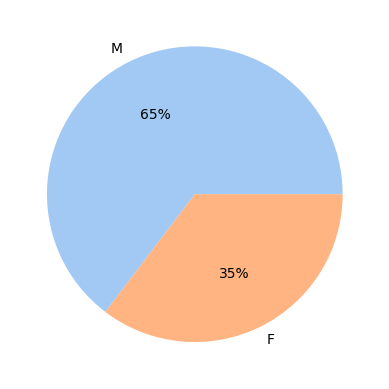

In [21]:
palette_color = sns.color_palette('pastel')

plt.pie(df.gender.value_counts(), colors=palette_color, labels=['M', 'F'], autopct='%.0f%%');

## Secondary Education

##### Percentage - 10th Grade

/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


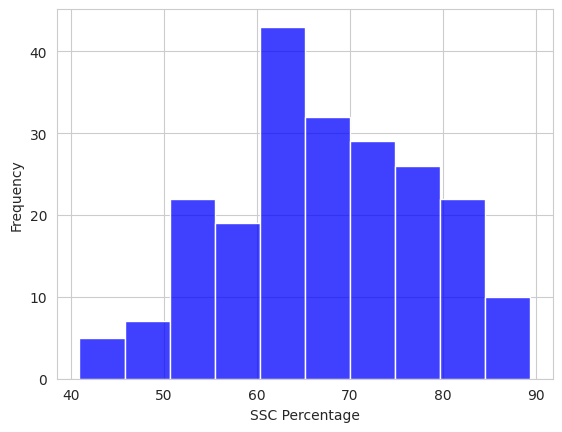

In [22]:
sns.set_style("whitegrid");

sns.histplot(
    data=df,
    x="ssc_p",
    color="blue",

);

plt.ylabel("Frequency");
plt.xlabel("SSC Percentage");

#### Board of Education

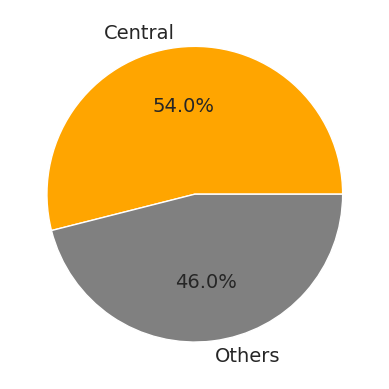

In [23]:
plt.pie(
    df.ssc_b.value_counts(),
    labels=dict_cat[2].values(),
    colors=['orange', 'gray'],
    autopct='%1.1f%%',
    textprops={'fontsize': 14}
);

## Higher Secondary Education 

#### Percentage - 12th Grade

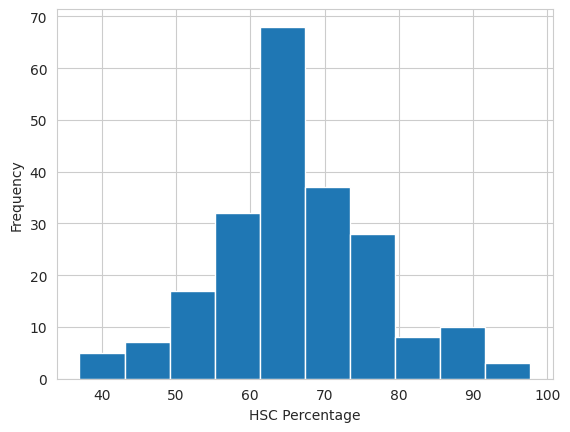

In [24]:
plt.hist(
    df.hsc_p,
    bins=10
)

sns.set_style("whitegrid");
sns.set_palette("Set2");

plt.ylabel("Frequency");
plt.xlabel("HSC Percentage");

#### Board of education

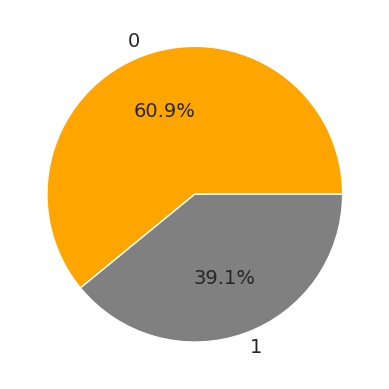

In [25]:
plt.pie(
    df.hsc_b.value_counts(),
    labels=dict_cat[2],
    colors=['orange', 'gray'],
    autopct='%1.1f%%',
    textprops={'fontsize': 14}
);

# Machine Learning

In [26]:
y = df.status
y.head()

sl_no
1    1
2    1
3    1
4    0
5    1
Name: status, dtype: int8

In [27]:
X = df.iloc[:, 0:-2]
X.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p
sl_no,,,,,,,,,,,,
1,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80
2,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28
3,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80
4,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43
5,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50


In [28]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [29]:
model = tree.DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [30]:
prediction = model.predict(X_test)

In [31]:
dot_data = tree.export_graphviz(model, out_file=None, feature_names=X.columns, class_names=dict_cat[-1], filled=True, rounded=True,  
...                      special_characters=True) 
graph = graphviz.Source(dot_data)
graph

IndexError: too many indices for array: array is 0-dimensional, but 1 were indexed

In [ ]:
print(classification_report(y_test, prediction))

In [ ]:
cm = confusion_matrix(y_test, prediction, labels=model.classes_)

In [ ]:
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_).plot()
plt.grid(False)
plt.show()